We are training to use polynomial regregion to train a set of randomly generated data

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
'''
First Generating training set and testing set
'''
def generatingData(N, coeff, fluc):
    '''
    Generating a set of data for which Y is approximately a polynomial of X
    :param N: sample set size
    :param coeff: polynomial coefficients
    :param fluc: fluctuation term
    :return: x, y
    '''
    x = 3.6*np.random.rand(N)
    delta = fluc*(np.random.rand(N) - 0.5)
    y = np.zeros(N)
    for j in range(N):
        tmp = 1
        for c in coeff:
            y[j] += tmp*c
            tmp *= x[j]
    y += delta
    return x, y

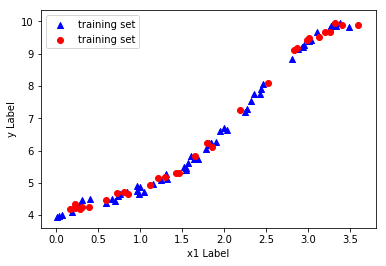

In [3]:
'''Plotting the generated sample'''
Poly_coeff = [4., 1.5, -1.7, 1.2, -0.2]

x_train, y_train = generatingData(60, Poly_coeff, 0.3)
x_test, y_test = generatingData(30, Poly_coeff, 0.3)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_train, y_train, c='b', marker='^', label = "training set")
ax.scatter(x_test, y_test, c='r', marker='o', label = "training set")

ax.set_xlabel('x1 Label')
ax.set_ylabel('y Label')
ax.legend()

plt.show()

In [4]:
'''Begin to train the data'''
def trainData(N_par, x, y, l_rate, r_var, N_step):
    '''
    Training the data with different polynomial models
    h(x) = \sum_{i=0}^{N_par} h_i * x^{i}
    :param N_para: number of features
    :param x: feature variables
    :param y: output
    :param l_rate: learning rate for Gradient descent
    :param r_var: regularization factor
    :param N_step: iteration steps
    :return: The parameter vector \vec{h}
    '''
    h_vec = np.zeros(N_par + 1)
    h_vec[0] = 4.
    h_vec[1] = 1.5

    #creating a feature matrix
    m = len(x)
    X = []
    for ele in x:
        tmp_vec = []
        for i in range(N_par+1):
            tmp_vec.append(ele**i)
        X.append(np.array(tmp_vec))

    for step in range(N_step):
        h_tmp = h_vec
        reg_vec = l_rate/m * r_var* h_vec
        reg_vec[0] = 0.
        for i in range(m):
            h_vec -= l_rate/m * (np.dot(X[i], h_tmp) - y[i]) * X[i] - reg_vec
    return h_vec

[ 4.07195713  0.68922009 -0.54745748  0.67301932 -0.1238992 ]


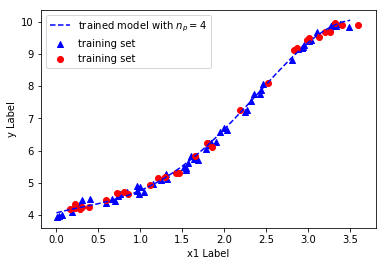

In [5]:
'''ploting the plot results'''
l_rate = 0.003
r_var = 0.
h_vec = trainData(4, x_train, y_train, l_rate, r_var, 20000)
x_plt = np.arange(0., 3.6, 0.1)
y_plt = h_vec[0] + h_vec[1]*x_plt + h_vec[2]*x_plt**2 + h_vec[3]*x_plt**3 + h_vec[4]*x_plt**4
print(h_vec)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_train, y_train, c='b', marker='^', label = "training set")
ax.scatter(x_test, y_test, c='r', marker='o', label = "training set")
ax.plot(x_plt, y_plt, '--', color='blue', label = 'trained model with $n_p = 4$')

ax.set_xlabel('x1 Label')
ax.set_ylabel('y Label')
ax.legend()

plt.show()

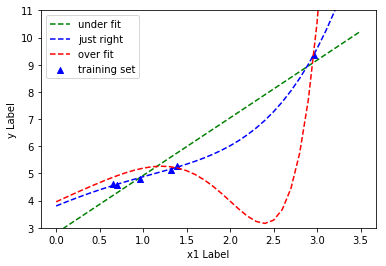

In [8]:
'''
Investigate under fit, just right and over fit, we keep the learning rate unchanged
'''
rate_list = [0.01, 0.0001, 0.000001]
Ns_list = [5000, 50000, 150000]
r_var = 0.
labels = ['under fit', 'just right', 'over fit']
colors = ['green', 'blue', 'red']
N_list = [1, 4, 7]
m_train = 6
x_train, y_train = generatingData(m_train, Poly_coeff, 0.1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_train, y_train, c='b', marker='^', label = "training set")
for i in range(3):
    par_vec = trainData(N_list[i], x_train, y_train, rate_list[i], r_var, Ns_list[i])
    y_plt = np.zeros(len(x_plt))
    for j in range(len(x_plt)):
        for k in range(N_list[i]+1):
            y_plt[j] += par_vec[k]*x_plt[j]**k
    ax.plot(x_plt, y_plt, '--', color=colors[i], label=labels[i])


ax.set_xlabel('x1 Label')
ax.set_ylabel('y Label')
ax.set_ylim((3., 11))
ax.legend()

plt.show()

In [9]:
'''Define functions to compute errors'''
def computeError(h_vec, x, y):
    '''
    compute standard deviation
    :param h_vec: parameters
    :param x: feature variables
    :param y: output values
    :return: errors
    '''
    N_par = len(h_vec)
    # creating a feature matrix
    m = len(x)
    X = []
    for ele in x:
        tmp_vec = []
        for i in range(N_par + 1):
            tmp_vec.append(ele ** i)
        X.append(np.array(tmp_vec))
    error = np.dot(np.array(X), h_vec) - y
    return 1./m * np.dot(error, error)